In [4]:
import pandas as pd
import geopandas as gpd

df = gpd.read_file(
    "../data/processed/india_dengue_state_year.geojson",
    ignore_geometry=True
)

# 🔑 Critical fix
df["cases"] = pd.to_numeric(df["cases"], errors="coerce")


In [5]:
pivot = (
    df.pivot_table(
        values="cases",
        index="state_std",
        columns="year",
        aggfunc="sum"
    )
    .sort_index()
)


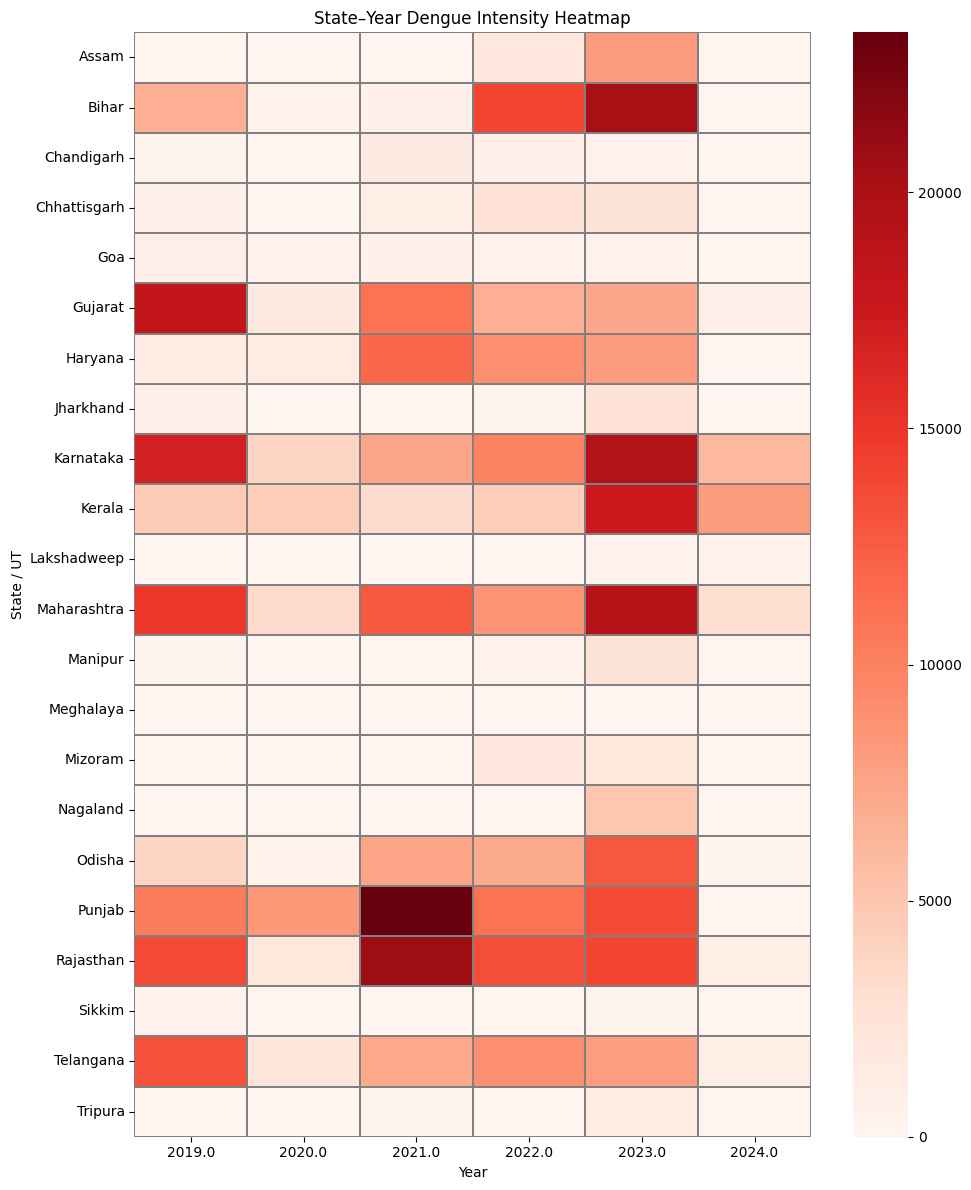

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
sns.heatmap(
    pivot,
    cmap="Reds",
    linewidths=0.3,
    linecolor="gray"
)

plt.title("State–Year Dengue Intensity Heatmap")
plt.xlabel("Year")
plt.ylabel("State / UT")
plt.tight_layout()
plt.show()
